In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

from IPython.display import clear_output
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import numpy as np
import time
import scipy.io
import pandas as pd

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("upsample.csv")
x1 = df['GLIR'].to_numpy()
x1 = x1.reshape(len(x1),1)
y1 = df['Qo'].to_numpy()
x = torch.from_numpy(x1)
x = torch.tensor(x,dtype=torch.float)

y = torch.from_numpy(y1)
y = torch.tensor(y,dtype=torch.float)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_7972/2680003510.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,dtype=torch.float)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_7972/2680003510.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,dtype=torch.float)


In [3]:
type(x1)

numpy.ndarray

In [4]:
"""data = scipy.io.loadmat('regressionsine.mat')
x1 = data.get('x')
#x = np.concatenate(x, axis)
x = torch.from_numpy(x1)
x = torch.tensor(x,dtype=torch.float)
y1 = data.get('y')
#y = np.concatenate( y, axis=0 )
y = torch.from_numpy(y1)
y = torch.tensor(y,dtype=torch.float)"""

"data = scipy.io.loadmat('regressionsine.mat')\nx1 = data.get('x')\n#x = np.concatenate(x, axis)\nx = torch.from_numpy(x1)\nx = torch.tensor(x,dtype=torch.float)\ny1 = data.get('y')\n#y = np.concatenate( y, axis=0 )\ny = torch.from_numpy(y1)\ny = torch.tensor(y,dtype=torch.float)"

In [5]:
# this is one way to define a network
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_hidden1, n_output):
        super(Net, self).__init__()
        self.hidden = nn.Linear(n_feature, n_hidden, bias=True)    # hidden layer0
        self.hidden1 = nn.Linear(n_hidden, n_hidden1, bias=True)   # hidden layer1
        self.predict = nn.Linear(n_hidden1, n_output, bias=True)   # output layer

    def forward(self, x):
        x = F.softmax(self.hidden(x))      # softmax activation function for hidden layer0
        x = F.relu(self.hidden1(x))        # relu activation function for hidden layer1
        x = self.predict(x)                # linear output
        return x

net = Net(n_feature=1, n_hidden=50, n_hidden1=50, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss_func = nn.MSELoss()  # this is for regression mean squared loss


Net(
  (hidden): Linear(in_features=1, out_features=50, bias=True)
  (hidden1): Linear(in_features=50, out_features=50, bias=True)
  (predict): Linear(in_features=50, out_features=1, bias=True)
)


In [6]:
def plot(t,x,y,predict,losses,dt):
    clear_output(True)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title('iteration %s'% (t))
    plt.plot(times.data.numpy(),y.data.numpy()[0:1000], color = "orange")
    
    plt.text(0, -2.5, 'scan time = %.4f' % dt, fontdict={'size': 12, 'color':  'red'})
    plt.text(0, -2.1, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 12, 'color':  'red'})
    
    plt.plot(times.data.numpy(),predict.data.numpy()[0:1000], color = "green")
    
    plt.subplot(122)
    plt.title('Loss')
    plt.plot(losses)
    
    plt.show()

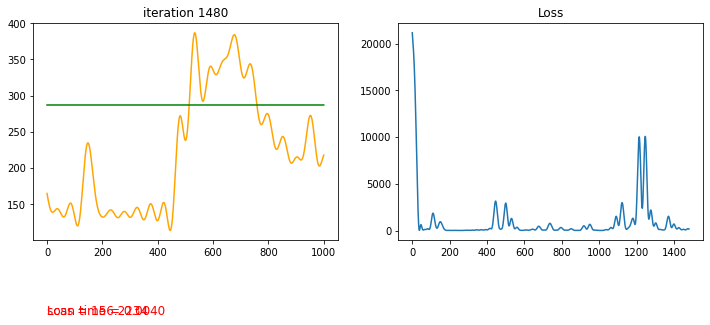

C:\Users\ASUS\AppData\Local\Temp/ipykernel_7972/1031193267.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.hidden(x))      # softmax activation function for hidden layer0
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([35])) that is different to the input size (torch.Size([19, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([35])) that is different to the input size (torch.Size([18, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, re

In [7]:
predictiond=[]
losses=[]
N = 35      # window size

times = torch.unsqueeze(torch.linspace(0, 1000,1000), dim=1)
for t in range(1500):
    start = time.time()  
    
    prediction = net(x[0:1500])     # input x and predict based on x

    loss = loss_func(prediction[t:t+N], y[t:t+N])     # must be (1. nn output, 2. target)
    losses.append(loss.data.numpy())
    
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    duration = time.time()-start
    predictiond.append(prediction.data.numpy())

    #print(prediction.data.numpy())
    
    # plot and show learning process
    if t % 20==0:
        plot(t,x,y,prediction,losses,duration)
        #print(net.predict.weight)
        #print(np.mean(losses),np.std(losses))
    

In [8]:
a = net.forward(x[:])
a

C:\Users\ASUS\AppData\Local\Temp/ipykernel_7972/1031193267.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.hidden(x))      # softmax activation function for hidden layer0


tensor([[289.8190],
        [289.8190],
        [289.8190],
        ...,
        [289.8190],
        [289.8190],
        [289.8190]], grad_fn=<AddmmBackward0>)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_7972/1031193267.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.hidden(x))      # softmax activation function for hidden layer0
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(4167.0547, grad_fn=<MseLossBackward0>)


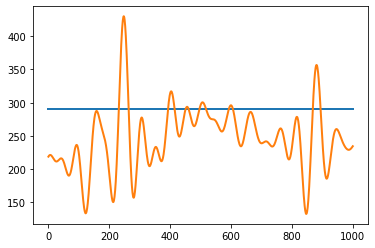

In [9]:
y_test = net(x[1000:2000])
plt.plot(times.data.numpy(), y_test.data.numpy(), times.data.numpy(), y.data.numpy()[1000:2000], lw=2)
loss = loss_func(y_test, y[1000:2000])
print(loss)

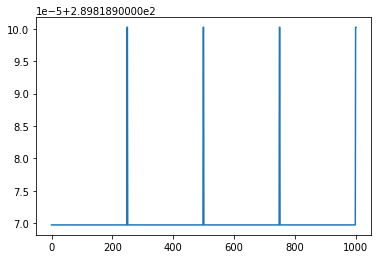

In [10]:
plt.plot(times.data.numpy(), y_test.data.numpy())

ALL CODING

C:\Users\ASUS\AppData\Local\Temp/ipykernel_7972/2725807160.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,dtype=torch.float)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_7972/2725807160.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,dtype=torch.float)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_7972/2725807160.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.hidden(x))      # softmax activation function for hidden layer0
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a ta

Net(
  (hidden): Linear(in_features=1, out_features=50, bias=True)
  (hidden1): Linear(in_features=50, out_features=50, bias=True)
  (predict): Linear(in_features=50, out_features=1, bias=True)
)


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([34])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([33])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect resu

"print('X VALUE:',x[1000:])\ny_test = net.forward(x[1000:])\nprint('Y VALUE:',y_test)\n#plt.plot(times.data.numpy(), y_test.data.numpy(), times.data.numpy(), y.data.numpy()[1000:2000], lw=2)\nloss = loss_func(y_test, y[1000:])\nprint(loss)"

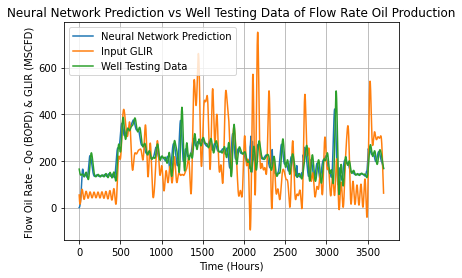

In [21]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt

import numpy as np
import time
import scipy.io
import pandas as pd

df = pd.read_csv("upsample_min.csv")
df = pd.read_csv("upsample.csv")
x1 = df['GLIR'].to_numpy()
x1 = x1.reshape(len(x1),1)
y1 = df['Qo'].to_numpy()
x = torch.from_numpy(x1)
x = torch.tensor(x,dtype=torch.float)

y = torch.from_numpy(y1)
y = torch.tensor(y,dtype=torch.float)

# this is one way to define a network
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_hidden1, n_output):
        super(Net, self).__init__()
        self.hidden = nn.Linear(n_feature, n_hidden, bias=True)    # hidden layer0
        self.hidden1 = nn.Linear(n_hidden, n_hidden1, bias=True)   # hidden layer1
        self.predict = nn.Linear(n_hidden1, n_output, bias=True)   # output layer

    def forward(self, x):
        x = F.softmax(self.hidden(x))      # softmax activation function for hidden layer0
        x = F.relu(self.hidden1(x))        # relu activation function for hidden layer1
        x = self.predict(x)                # linear output
        return x

net = Net(n_feature=1, n_hidden=50, n_hidden1=50, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss_func = nn.MSELoss()  # this is for regression mean squared loss


def plot(t,x,y,predict,losses,dt):
    clear_output(True)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title('iteration %s'% (t))
    plt.plot(times.data.numpy(),y.data.numpy()[0:1000], color = "orange")
    
    plt.text(0, -2.5, 'scan time = %.4f' % dt, fontdict={'size': 12, 'color':  'red'})
    plt.text(0, -2.1, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 12, 'color':  'red'})
    
    plt.plot(range(0,len(predict)),predict, color = "green")
    #plt.plot(times.data.numpy(),predict.data.numpy()[0:1000], color = "green")
    
    plt.subplot(122)
    plt.title('Loss')
    plt.plot(losses)
    
    plt.show()

predictiond=[]
preds = []
losses=[]
N = 35      # window size

n = len(x)
times = torch.unsqueeze(torch.linspace(0, n,n), dim=1)
for t in range(n):
    start = time.time()  
    
    prediction = net(x[0:t+1])     # input x and predict based on x
    #print("prediction value function:",prediction)

    #print(prediction[t:t+N])
    loss = loss_func(prediction[t:t+N], y[t:t+N])     # must be (1. nn output, 2. target)
    losses.append(loss.data.numpy())
    
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    duration = time.time()-start
    predictiond.append(prediction.data.numpy()[0][-1])
    preds.append(prediction.data.numpy())

    pred = prediction.data.numpy()[0]

    #print('value',np.shape(predictiond))
    #print('value',predictiond)
    
    # plot and show learning process
    #if t % 20==0:
        #plt.plot(t,x,y,preds,losses,duration)
        #print(net.predict.weight)
        #print(np.mean(losses),np.std(losses))
#plt.plot(t,x,y,predictiond,losses,duration)

#print('value',np.shape(predictiond))
#print('value',predictiond)
timee = []
t = range(0,len(predictiond))
for T in t:
    timee.append(T)

#print('time',np.shape(T))
#print('time',timee)

plt.plot(timee,predictiond,label='Neural Network Prediction')
plt.plot(timee,x[0:n], label='Input GLIR')
plt.plot(timee,y[0:n], label='Well Testing Data')
plt.xlabel("Time (Hours)")
plt.ylabel("Flow Oil Rate - Qo (BOPD) & GLIR (MSCFD)")
plt.title("Neural Network Prediction vs Well Testing Data of Flow Rate Oil Production")
plt.legend()
plt.grid()


"""print('X VALUE:',x[1000:])
y_test = net.forward(x[1000:])
print('Y VALUE:',y_test)
#plt.plot(times.data.numpy(), y_test.data.numpy(), times.data.numpy(), y.data.numpy()[1000:2000], lw=2)
loss = loss_func(y_test, y[1000:])
print(loss)"""


Metric

In [17]:
import math
MSE = np.square(np.subtract(y,predictiond)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:")
print(RMSE)

correlation = np.corrcoef(y,predictiond)[0,1]
print("\nR2 Value:")
print(correlation)

Root Mean Square Error:
44.05054414480172

R2 Value:
0.774604595399748


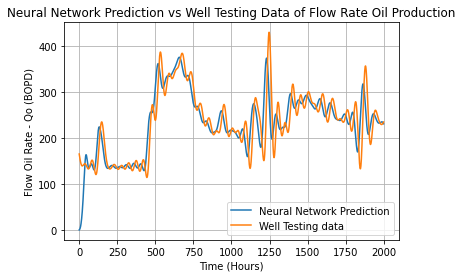

In [20]:
plt.plot(timee[0:2000],predictiond[0:2000],label='Neural Network Prediction')
plt.plot(timee[0:2000],y[0:2000], label='Well Testing data')
plt.xlabel("Time (Hours)")
plt.ylabel("Flow Oil Rate - Qo (BOPD)")
plt.title("Neural Network Prediction vs Well Testing Data of Flow Rate Oil Production")
plt.legend()
plt.grid()

TEST

tensor(3806.5984, grad_fn=<MseLossBackward0>)


C:\Users\ASUS\AppData\Local\Temp/ipykernel_7972/2725807160.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.hidden(x))      # softmax activation function for hidden layer0


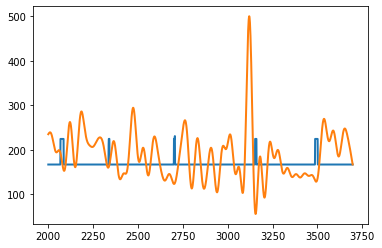

In [22]:
y_test = net.forward(x[2000:])
y = y.unsqueeze(1)
plt.plot(times.data.numpy()[2000:], y_test.data.numpy(), times.data.numpy()[2000:], y.data.numpy()[2000:], lw=2)
loss = loss_func(y_test, y[2000:])
print(loss)

In [18]:
a = np.arange(2000,len(x))
predictt = []
for n in a:
    predictions = net(x[2000:n+1])     # input x and predict based on x
    print(predictions[a:a+N])
    loss = loss_func(predictions[a:a+N], y[a:a+N])     # must be (1. nn output, 2. target)
    losses.append(loss.data.numpy())
    
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    duration = time.time()-start
    predictt.append(prediction.data.numpy()[0][-1])

    pred = prediction.data.numpy()[0]
    #print(len(predictt))


plt.plot(a,predictt)    

C:\Users\ASUS\AppData\Local\Temp/ipykernel_7972/2725807160.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.hidden(x))      # softmax activation function for hidden layer0


TypeError: only integer scalar arrays can be converted to a scalar index

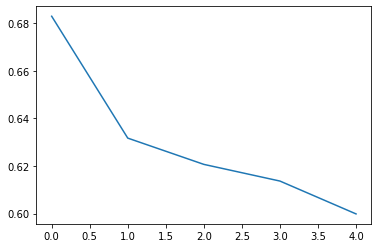

In [26]:
y = [0.6829032301902771, 0.6316949725151062, 0.620652973651886, 0.6136475205421448, 0.5998393893241882]
x = np.arange(0,len(y))

plt.plot(x,y)
